In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/btccad/BTC-CAD.csv


# DATA PRE-PROCESSING AND VISUALIZATION 
We visualize the data and look for holes in the dataset

In [2]:
data = pd.read_csv("/kaggle/input/btccad/BTC-CAD.csv")
data.head()
# Given data gives us 6 features and among them, we take every one of them as the target variable one at a time (except volume)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-03,40900.894531,44056.867188,40802.761719,41711.191406,41711.191406,100092071966
1,2021-01-04,41747.992188,42467.906250,36399.628906,40865.062500,40865.062500,103739501829
2,2021-01-05,40871.613281,43642.414063,38539.417969,43089.992188,43089.992188,85625353050
3,2021-01-06,43116.847656,46711.308594,42464.960938,46641.222656,46641.222656,95360542812
4,2021-01-07,46653.269531,51054.824219,46275.972656,49945.906250,49945.906250,107528828302


In [3]:
data.info(show_counts = True)
# There is no data loss and hence no modification of features is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [4]:
data.describe()
# All the parameters seem relatively close to each other 

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,59555.751633,61220.298679,57639.110880,59591.223425,59591.223425,5.885204e+10
std,12208.026006,12223.446121,12197.526272,12160.070145,12160.070145,3.125512e+10
min,37768.667969,39514.531250,35776.574219,37782.691406,37782.691406,2.370640e+10
25%,47462.879883,49631.318360,45709.519532,47572.708008,47572.708008,4.034410e+10
50%,60559.816407,62175.169922,59185.822266,60541.718750,60541.718750,4.985093e+10
75%,70395.865235,71967.244141,67849.617188,70406.248047,70406.248047,7.249640e+10
max,84050.781250,85357.960938,82605.906250,84072.054688,84072.054688,4.470696e+11


<AxesSubplot:xlabel='Close'>

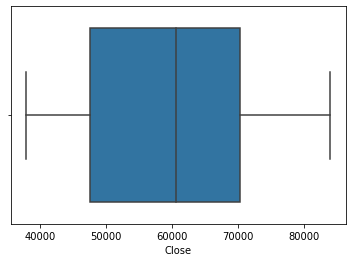

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# h = data.loc[0]
sns.boxplot(x="Close", data=data)
# sns.boxplot(x="Close", data=data)

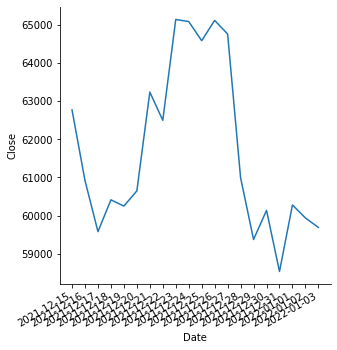

In [6]:
h = data.loc[346:366]
g = sns.relplot(x="Date", y="Close", kind="line", data=h) # similar graphs for open,high,low
g.figure.autofmt_xdate()

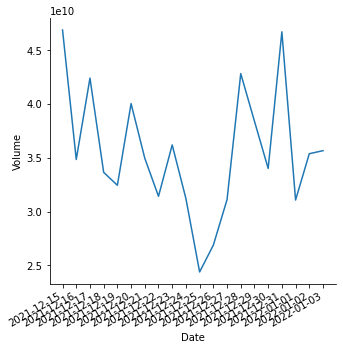

In [7]:
h = data.loc[346:366]
g = sns.relplot(x="Date", y="Volume", kind="line", data=h)
g.figure.autofmt_xdate()

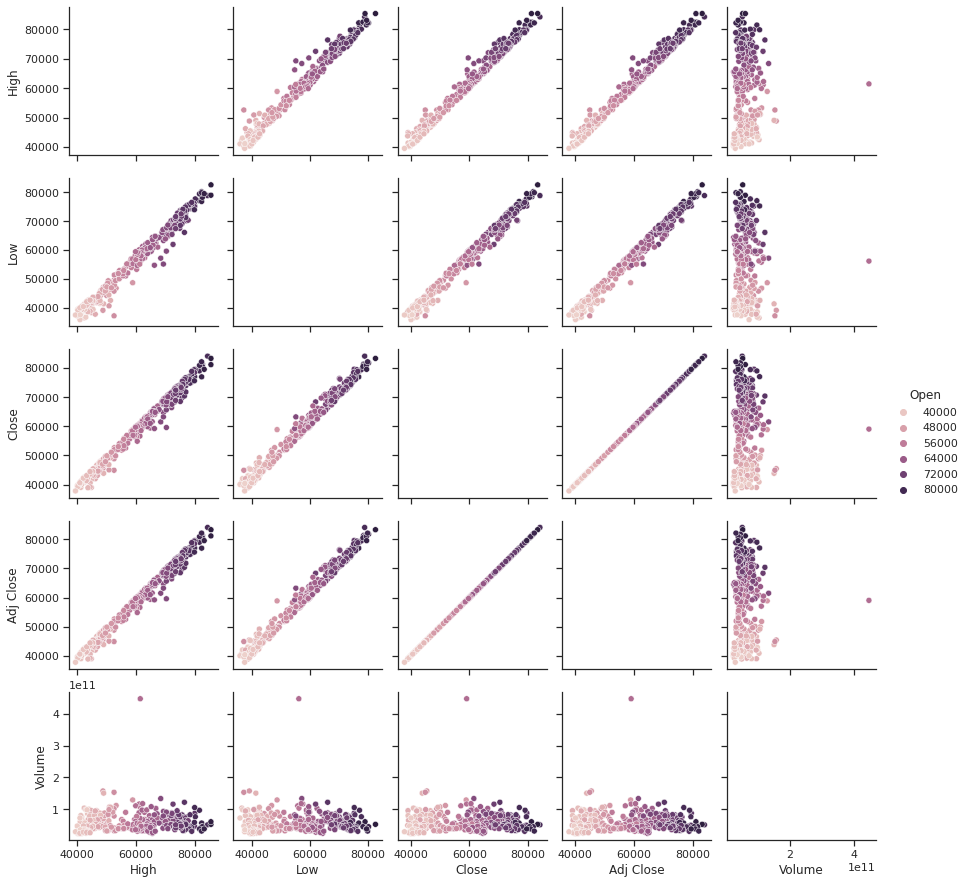

In [8]:
sns.set_theme(style="ticks")

sns.pairplot(data, hue="Open")

In [9]:
data.corr()
# we map this correlation matrix 
# conclude : we use high, low and open to predict the close price since they show high correlation 

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993011,0.986086,0.981487,0.981487,0.020256
High,0.993011,1.000000,0.986676,0.992051,0.992051,0.043342
Low,0.986086,0.986676,1.000000,0.991065,0.991065,-0.042532
Close,0.981487,0.992051,0.991065,1.000000,1.000000,0.005302
Adj Close,0.981487,0.992051,0.991065,1.000000,1.000000,0.005302
Volume,0.020256,0.043342,-0.042532,0.005302,0.005302,1.000000


In [10]:
input_data = data[['Open','Low','High']]
input_data.head()

,Open,Low,High
0,40900.894531,40802.761719,44056.867188
1,41747.992188,36399.628906,42467.906250
2,40871.613281,38539.417969,43642.414063
3,43116.847656,42464.960938,46711.308594
4,46653.269531,46275.972656,51054.824219


In [11]:
target_data = data[['Close']]
target_data.head()

,Close
0,41711.191406
1,40865.062500
2,43089.992188
3,46641.222656
4,49945.906250


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import r2_score

In [13]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.8, random_state=1)

In [14]:
rid = Ridge()

In [15]:
a = rid.fit(x_train,y_train)
a.coef_

array([[-0.31981215,  0.57718602,  0.72942846]])

In [16]:
x_test_pred_rd = rid.predict(x_test)
r2_score(y_test, x_test_pred_rd)

0.9933672658525949

In [17]:
a = 48716.60
b = 48621.52
c = 50568.55
predicted_value = (-0.31981215*a+0.57718602*b+ 0.72942846*c)
print(predicted_value)

49369.64057939339
